In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

In [2]:
x = [[1],[2],[3],[4]]
y = [[2],[4],[6],[8]]

In [3]:
model = Sequential()
model.add(Dense(1, activation='linear', input_shape=(1,)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.2789165]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [5]:
model.get_weights()

[array([[1.2789165]], dtype=float32), array([0.], dtype=float32)]

In [8]:
from keras.optimizers import SGD
s= SGD(learning_rate = 0.01)
model.compile(optimizer=s,loss='mean_squared_error',metrics=['accuracy'])

In [9]:
from copy import deepcopy

In [10]:
w = deepcopy(model.get_weights())

In [12]:
w

[[[-0.07377076]], [0.0]]

In [11]:
w = [[[-0.07377076]], [0.]]
w

[[[-0.07377076]], [0.0]]

In [13]:
w[0]

[[-0.07377076]]

In [14]:
def feed_forward(inputs, outputs, weights):
    hidden = np.dot(inputs,weights[0])
    out = hidden+weights[1]
    squared_error = (np.square(out - outputs))
    return squared_error

In [15]:
def update_weights(inputs, outputs, weights, epochs):  
    for epoch in range(epochs):
        org_loss = feed_forward(inputs, outputs, weights)  
        wts_tmp = deepcopy(weights)
        wts_tmp2 = deepcopy(weights)
        for ix, wt in enumerate(weights): 
            wts_tmp[-(ix+1)] += 0.0001
            # print('wts_tmp:', wts_tmp)
            loss = feed_forward(inputs, outputs, wts_tmp)
            # print('loss', loss)
            del_loss = np.sum(org_loss - loss)/(0.0001*len(inputs))
            wts_tmp2[-(ix+1)] += del_loss*0.01
            wts_tmp = deepcopy(weights)

        weights = deepcopy(wts_tmp2)
    return wts_tmp2

In [16]:
w = [2000, 0]
w[-1]

0

In [17]:
import numpy as np
from copy import deepcopy
update_weights(x,y,w,1)

[1700.2999925636686, -99.90000113612041]

In [18]:
w_val = []
b_val = []
for k in range(100):
    w_new, b_new = update_weights(x,y,w,(k+1))
    w_val.append(w_new)
    b_val.append(b_new)

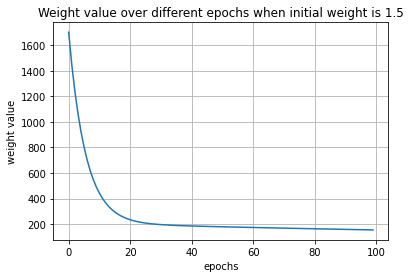

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(w_val)
plt.title('Weight value over different epochs when initial weight is 1.5')
plt.xlabel('epochs')
plt.ylabel('weight value')
plt.grid('off')

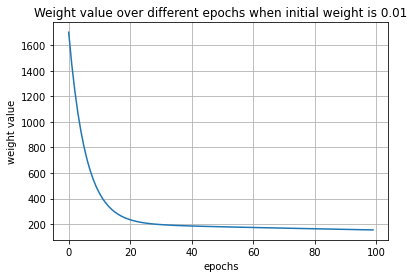

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(w_val)
plt.title('Weight value over different epochs when initial weight is 0.01')
plt.xlabel('epochs')
plt.ylabel('weight value')
plt.grid('off')

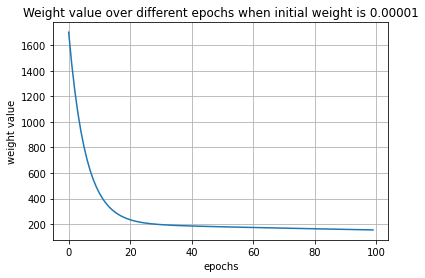

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(w_val)
plt.title('Weight value over different epochs when initial weight is 0.00001')
plt.xlabel('epochs')
plt.ylabel('weight value')
plt.grid('off')

In [22]:
w = list(model.get_weights().copy())
w

[array([[1.2789165]], dtype=float32), array([0.], dtype=float32)]

In [23]:
update_weights(x,y,w,100)

[array([[1.9445271]], dtype=float32), array([0.16295929], dtype=float32)]

In [24]:
model.fit(np.array(x), np.array(y), epochs=100, batch_size = 4, verbose=1)

Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 3.8997 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 2.7083 - accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 1.8817 - accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 1.3080 - accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 0.9100 - accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6338 - accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 0.4421 - accuracy: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 0.3091 - accuracy: 0.0000e+00
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2168 - accuracy: 0.0000e+00
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1528 - accuracy

In [25]:
model.get_weights()

[array([[1.9446019]], dtype=float32), array([0.16287738], dtype=float32)]